# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

**R:**
1. Revisar el archivo para conocer la estructura del contenido y utilizar las propediades adecuadas para leerlo
2. Usar el método info() para conocer el tipo de datos, la cantidad de información, el total de columnas y qué columnas tienen datos nulos
3. Imprimir una muestra de los datos con el método head() para conocer el tipo de información que contiene cada columna

In [314]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [315]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('datasets/products.csv', sep=';')
df_order_products = pd.read_csv('datasets/order_products.csv', sep=';')
df_aisles = pd.read_csv('datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('datasets/departments.csv', sep=';')

### DataFrame: `df_instacart_orders`

In [316]:
# mostrar información del DataFrame df_instacart_orders
df_instacart_orders.info()
# mostrar las primeras filas del DataFrame df_instacart_orders
df_instacart_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


### DataFrame: `df_products`

In [317]:
# mostrar información del DataFrame df_products
df_products.info()
# mostrar las primeras filas del DataFrame df_products
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### DataFrame: `df_order_prodcts`

In [318]:
# mostrar información del DataFrame df_order_products
df_order_products.info()
# mostrar las primeras filas del DataFrame df_order_products
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


### DataFrame: `df_aisles`

In [319]:
# mostrar información del DataFrame df_aisles
df_aisles.info()
# mostrar las primeras filas del DataFrame df_aisles
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### DataFrame: `df_departments`

In [320]:
# mostrar información del DataFrame df_departments
df_departments.info()
# mostrar las primeras filas del DataFrame df_departments
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

- ***df_instacart_orders:*** 478967 filas, days_since_prior_order tiene valores nulos. order_id y user_is son de tipo int64 y podría ser mejor strings ya que no se hacen operaciones con estos datos.
- ***df_products:*** 49694 filas, product_name tiene valores nulos. product_id, aisle_id y department_id son de tipo int64 y podría ser mejor strings ya que no se hacen operaciones con estos datos.
- ***df_order_products:*** 4545007 filas, add_to_cart_order tiene valores nulos. order_id y product_id son de tipo int64 y podría ser mejor strings ya que no se hacen operaciones con estos datos. reordered es una variable categorica
- ***df_aisles:*** 131 filas, aisle_id es de tipo int64 y podría ser mejor string ya que no se hacen operaciones con estos datos.
- ***df_departments:*** 27 filas, department_id es de tipo int64 y podría ser mejor string ya que no se hacen operaciones con estos datos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

**R:**
1. Ajustar Tipos de datos, en caso de ser necesario
2. Limpiar valores duplicados, tanto explicitos e implicitos.
3. Identificar los valores ausente, tomar una decisión de que se puede hacer con ello, completarlos de otros datos, deducirlos a partir de otros datos o eliminarlos. Lo importante es no perder la consistendia de los datos actuales

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame `df_instacart_orders`

In [321]:
# Revisa si hay pedidos duplicados df_instacart_orders
duplicates_orders = df_instacart_orders.duplicated().sum()
print(f"Pedidos duplicados: {duplicates_orders}")
# Print duplicated rows
print('\nLos valores duplicados son:')
duplicate = df_instacart_orders[df_instacart_orders.duplicated()]
print(duplicate)
print('\nEjemplo de valores duplicados')
print(df_instacart_orders[df_instacart_orders['order_id'] == 1112182])


Pedidos duplicados: 15

Los valores duplicados son:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

**R:** Sí hay 15 valores duplicados, toda la fila tiene los mismo valores. Todos los repetidos son del día miércoles a las 2am

In [322]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders_miercoles_2am = df_instacart_orders[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3)]
print(df_orders_miercoles_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

**R:** Como hay 121 registros, incluyendo los 15 repetidos, no necesariamente todos los pedidos de los miércoles a las 2am son datos repetidos. Solo son pedidos que se hicieron en la misma hora y día. Es posible que sea una situación normal de alta demanda o promoción del negocio

In [323]:
# Elimina los pedidos duplicados
df_instacart_orders.drop_duplicates(inplace=True)

In [324]:
# Vuelve a verificar si hay filas duplicadas
duplicates_orders = df_instacart_orders.duplicated().sum()
print(f"Pedidos duplicados: {duplicates_orders}")

Pedidos duplicados: 0


In [325]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicates_order_ids = df_instacart_orders['order_id'].duplicated().sum()
print(f"Duplicados en 'order_id': {duplicates_order_ids}")

Duplicados en 'order_id': 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

**R:** No hay duplicados implicitos con IDs repetidos

### `products` data frame `df_products`

In [326]:
# Verifica si hay filas totalmente duplicadas df_products
duplicates_products = df_products.duplicated().sum()
print(f"Productos duplicados: {duplicates_products}")

Productos duplicados: 0


In [327]:
# Revisa únicamente si hay ID de departamentos duplicados
duplicates_department_ids = df_products['department_id'].duplicated().sum()
print(f"Duplicados en 'department_id': {duplicates_department_ids}")
print('Valores únicos:')
print(df_products['department_id'].unique())

Duplicados en 'department_id': 49673
Valores únicos:
[19 13  7  1 11 16 17 18 12  9  8 14 15  4 21  6 20  5  3  2 10]


In [328]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicates_product_names = df_products['product_name'].str.upper().duplicated().sum()
print(f"Duplicados en 'product_name': {duplicates_product_names}")

Duplicados en 'product_name': 1361


In [329]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicates_product_names_non_null = df_products[df_products['product_name'].notnull()]['product_name'].str.upper().duplicated().sum()
print(f"Duplicados en 'product_name' (no nulos): {duplicates_product_names_non_null}")

print('\nListado de productos no nulos duplicados:')
list_duplicates_product_names_non_null = df_products[df_products['product_name'].notnull()]['product_name'].str.upper()
print(list_duplicates_product_names_non_null[list_duplicates_product_names_non_null.duplicated()])

print('\nEjemplo de duplicados en \'product_name\' (no nulos):')
print(df_products[df_products['product_name'].str.upper() == 'CREAM OF MUSHROOM SOUP'])

Duplicados en 'product_name' (no nulos): 104

Listado de productos no nulos duplicados:
2058                                     BIOTIN 1000 MCG
5455                    GREEN TEA WITH GINSENG AND HONEY
5558                              CREAM OF MUSHROOM SOUP
7558                           CINNAMON ROLLS WITH ICING
9037                              AMERICAN CHEESE SLICES
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 104, dtype: object

Ejemplo de duplicados en 'product_name' (no nulos):
      product_id            product_name  aisle_id  department_id
5438        5439  Cream of Mushroom Soup        69             15
5558        5559  Cream Of Mushroom Soup        69   

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**R:** Hay 104 productos repetidos en la columna `product_name` con diferente `product_id`. Estos productos son todos no nulos. 

### `departments` data frame `df_departments`

In [330]:
# Revisa si hay filas totalmente duplicadas
duplicates_departments = df_departments.duplicated().sum()
print(f"Departamentos duplicados: {duplicates_departments}")

Departamentos duplicados: 0


In [331]:
# Revisa únicamente si hay IDs duplicadas de productos, se sobre entiende que son IDs de departamentos en vez de productos
duplicates_department_ids = df_departments['department_id'].duplicated().sum()
print(f"IDs duplicados en departamentos: {duplicates_department_ids}")

IDs duplicados en departamentos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**R:** No hay valores duplicados en en DataFrame `df_departments` y no hay IDs de departamento duplicados. Esto significa que todos los departamentos son únicos y no hay información redundante en el DataFrame. Por lo tanto, no se realizaron ninguna acción adicional con estos datos.

### `aisles` data frame `df_aisles`

In [332]:
# Revisa si hay filas totalmente duplicadas
duplicates_aisle = df_aisles.duplicated().sum()
print(f"Filas completamente duplicadas en aisles: {duplicates_aisle}")

Filas completamente duplicadas en aisles: 0


In [333]:
# Revisa únicamente si hay IDs duplicadas de pasillos
duplicate_aisles_ids = df_aisles['aisle_id'].duplicated().sum()
print(f"IDs de pasillo duplicados en aisles: {duplicate_aisles_ids}")

IDs de pasillo duplicados en aisles: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**R:** No se encontraron filas completamente duplicadas ni IDs de pasillos duplicados en el DataFrame `df_aisles`. Esto significa que cada fila representa un pasillo único y no hay información redundante. No se realizaron ninguna acción adicional ya que no hubo duplicados detectados.

### `order_products` data frame `df_order_products`

In [334]:
# Revisa si hay filas totalmente duplicadas
duplicate_order_products = df_order_products.duplicated().sum()
print(f"Filas completamente duplicadas en order_products: {duplicate_order_products}")

Filas completamente duplicadas en order_products: 0


In [335]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
grouping_order_and_product = df_order_products.groupby(['order_id', 'product_id'])['product_id'].count()
print(f'El valor minimo es: {grouping_order_and_product.min()}')
print(f'El valor máximo es: {grouping_order_and_product.max()}')
print('Cada id_orden tiene un product_id único.')

El valor minimo es: 1
El valor máximo es: 1
Cada id_orden tiene un product_id único.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**R:** Se agruparon los order_id junto con product_id, para ver si se repetenian y evaluar posibles duplicados, se imprime el min() y max() para saber sí hay más de un producto del mismo product_id en elal misma orden

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame `df_products`

In [336]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_values = df_products['product_name'].isnull().sum()
print(f"Valores ausentes en 'product_name': {missing_values}")
# Obtener el listado de registros nulos
list_missing_values = df_products[df_products['product_name'].isnull()]
print(list_missing_values)

Valores ausentes en 'product_name': 1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

**R:** Parece que todos los registros sin 'product_name' son de aisle_id = 100 y department_id = 21

In [337]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# Contar el total de aisle_id == 100 de list_missing_values
total_aisle_100 = list_missing_values['aisle_id'].value_counts().get(100, 0)
print(f"Total de registros con product_name = NaN y aisle_id == 100: {total_aisle_100}")
full_total_aisle_100 = df_products['aisle_id'].value_counts().get(100, 0)
print(f"Total de registros con aisle_id == 100: {full_total_aisle_100}")

Total de registros con product_name = NaN y aisle_id == 100: 1258
Total de registros con aisle_id == 100: 1258


Describe brevemente cuáles son tus hallazgos.

**R:** Se tienen 1258 registros con aisle_id = 100, por lo tanto, se puede decir que todos los nombres de productos ausentes están relacionados con el pasillo con ID 100.

In [338]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Contar el total de department_id == 21 de list_missing_values
total_department_21 = list_missing_values['department_id'].value_counts().get(21, 0)
print(f"Total de registros con product-name = NaN y department_id == 21: {total_department_21}")
gran_total_department_21 = df_products['department_id'].value_counts().get(21, 0)
print(f"Total de registros en department_id == 21: {gran_total_department_21}")

Total de registros con product-name = NaN y department_id == 21: 1258
Total de registros en department_id == 21: 1258


Describe brevemente cuáles son tus hallazgos.

**R:** Se tienen 1258 registros con department_id = 21, por lo tanto, se puede decir que todos los nombres de productos ausentes están relacionados con el departamento con ID 21.

In [339]:
# Usa las tablas df_department y df_aisle para revisar los datos del aisle_id == 100 y el department_id == 21
deparment_id_21 = df_departments[df_departments['department_id'] == 21]
print(deparment_id_21)
aisle_id_100 = df_aisles[df_aisles['aisle_id'] == 100]
print(aisle_id_100)

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

**R:** La descripción de los campos departmen_id = 21 y aisle_id = 100 es missing. 

In [340]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
# Validar nombres ausentes
missing_values = df_products['product_name'].isnull().sum()
print(f"Valores ausentes en 'product_name': {missing_values}")

Valores ausentes en 'product_name': 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**R:** Se analizarón los valores ausentes en el DataFrame df_products, se identifico un patron que ayudara a entender con que valor se podrían rellenar los valores ausentes y saber si poría afectar a la información.

### `orders` data frame `df_instacart_orders`

In [341]:
# Encuentra los valores ausentes en el Dataframe df_instacart_orders
missing_values_in_orders = df_instacart_orders.isna().sum()
print(f"Valores ausentes:\n{missing_values_in_orders}")

Valores ausentes:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [342]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
total_first_order_and_NaN = df_instacart_orders[(df_instacart_orders['order_number'] > 2) & (df_instacart_orders['days_since_prior_order'].isnull())]
print(f"Total de pedidos después del primero sin valor en 'days_since_prior_order': {total_first_order_and_NaN.shape[0]}")

Total de pedidos después del primero sin valor en 'days_since_prior_order': 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**R:** Todos los valores ausentes pertencen al primer pedido del cliente. Se puede setear el valor de 0 para estos valores.

In [343]:
# Sustituir valores ausentes en 'days_since_prior_oder' del DataFrame df_instacart_orders por 0
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].fillna(0)
# Validando valores nulos de nuevo
missing_values_in_orders = df_instacart_orders.isna().sum()
print(f"Valores ausentes:\n{missing_values_in_orders}")

Valores ausentes:
order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


### `order_products` data frame `df_order_products`

In [344]:
# Encuentra los valores ausentes en el dataframe df_order_products
missing_values_in_df_order_products = df_order_products.isna().sum()
print(f"Valores ausentes:\n{missing_values_in_df_order_products}")

Valores ausentes:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [345]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()
print(f"Valor mínimo: {min_value}, Valor máximo: {max_value}")

Valor mínimo: 1.0, Valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.

**R:** La columna `add_to_cart_order` tiene valores ausentes, lo cual podría indicar que algunos productos no fueron añadidos al carrito en el orden esperado o que hubo algún error durante la carga de los datos. Además, hay un rango amplio de valores en esta columna, desde 1 hasta 64, lo que sugiere que los productos pueden haber sido añadidos al carrito en diferentes momentos del proceso de compra. 

In [346]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_orders = df_order_products[df_order_products['add_to_cart_order'].isna()]
print(f'Ordenes de productos con valores nulos:\n {missing_cart_orders}')

Ordenes de productos con valores nulos:
          order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [347]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_cart_orders_grouped = missing_cart_orders.groupby('order_id')['product_id'].count()
min_product_count = missing_cart_orders_grouped.min()
max_product_count = missing_cart_orders_grouped.max()
# Imprime los resultados
print(f'El pedido con el menor número de productos tiene: {min_product_count} productos')
print(f'El pedido con el mayor número de productos tiene: {max_product_count} productos')


El pedido con el menor número de productos tiene: 1 productos
El pedido con el mayor número de productos tiene: 63 productos


Describe brevemente cuáles son tus hallazgos.
**R:** Todos los valores ausentes parece que fueron generados por un error al registrar los productos de un pedido

In [348]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
missing_values_in_df_order_products = df_order_products.isna().sum()
print(f"Valores ausentes:\n{missing_values_in_df_order_products}")

df_order_products.info()


Valores ausentes:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**R:** No hay una lógica que permita identificar la causa de los valores ausentes en la columna 'add_to_cart_order'. Se ha convertido a tipo entero para evitar problemas con los cálculos posteriores. No se han eliminado las filas con valores ausentes ya que no hay una lógica clara para hacerlo. Se ha sustiuido el valor ausente con el valor de 999 para indicar que ha sido un error del sistema.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

**R:** La identificación de valores duplicados es importante para la limpieza de datos, ya que pueden afectar la calidad del análisis. En este caso, se identificaron duplicados explicitos e implicitos. Además se identificaron los valores ausentes de cada DataFrame, se analizó una lógica que permita sustituir los valores ausentes sin poner el riesgo los calculos a reallizar.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [349]:
# 1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
# Compute Max and Min of 'order_hour_of_day' from df_instacart_orders
min_order_hour_of_day = df_instacart_orders['order_hour_of_day'].min()
max_order_hour_of_day = df_instacart_orders['order_hour_of_day'].max()
print(f'order_hour_of_day oscila de {min_order_hour_of_day} a {max_order_hour_of_day}')
# Compute Max and Min of 'order_dow' from df_instacart_orders
min_order_dow = df_instacart_orders['order_dow'].min()
max_order_dow = df_instacart_orders['order_dow'].max()
print(f'order_dow oscila de {min_order_dow} a {max_order_dow}')

order_hour_of_day oscila de 0 a 23
order_dow oscila de 0 a 6


Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

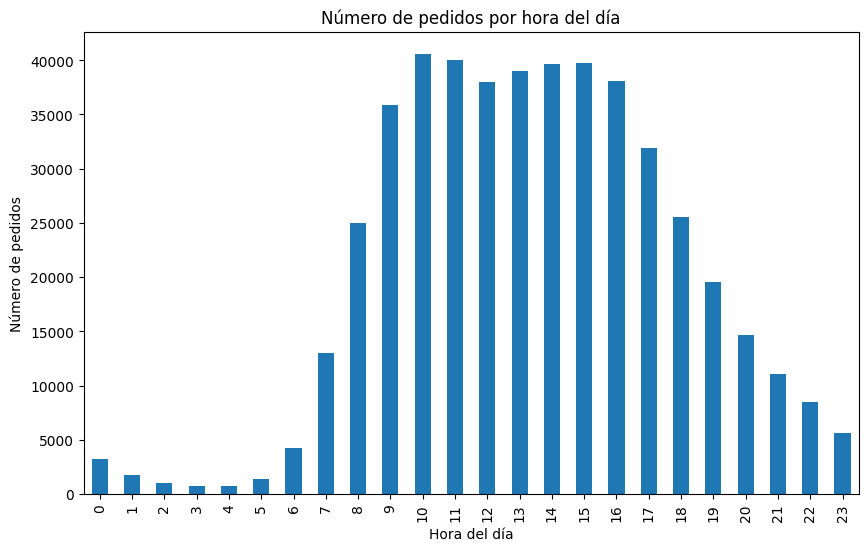

In [350]:
# 2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
df_instacart_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

**R:** La mayor cantidad de pedidos ocurren entre las 10:00 AM y las 4:00 PM. Esto sugiere que la demanda de productos es mayor durante este período del día, lo que podría ser útil para optimizar el inventario y la entrega.

### [A3] ¿Qué día de la semana compran víveres las personas?

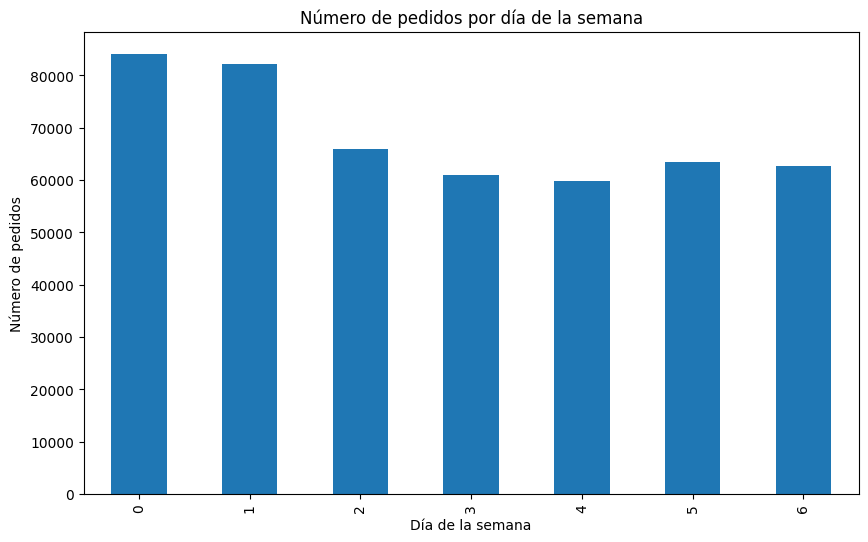

In [351]:
# 3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
df_instacart_orders['order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

**R:** La mayoría de los pedidos ocurren durante el día domingo, seguido por el lunes. El día de menor cantidad de pedidos es el jueves


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

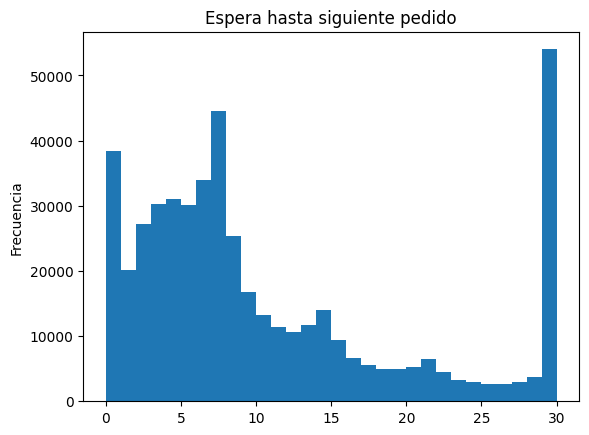

count    478952.000000
mean         10.433853
std           9.292153
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


In [352]:
# 4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.
df_instacart_orders['days_since_prior_order'].plot(kind='hist', bins=30, title='Espera hasta siguiente pedido', ylabel='Frecuencia')
plt.show()

print(df_instacart_orders['days_since_prior_order'].describe())


Escribe aquí tus conclusiones

**R:** La mayoria de la gente espera 30 días para realizar su siguiente pedido, esto se puede atribuir a que se esperan al siguiente mes para realizar su siguiente compra. El valor minimo es 0, pero eso significa que es el primer pedido, se intuye que hay bastante gente que está haciendo un primer pedido. Del día 1 al día 7 se van aumentado los pedidos, pero después comienzan a disminuir hasta el siguiente mes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [353]:
order_hour_of_wednesday = df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
print(order_hour_of_wednesday)

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: count, dtype: int64


In [354]:
order_hour_of_saturday = df_instacart_orders[df_instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
print(order_hour_of_saturday)

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: count, dtype: int64


In [355]:
wednesday_and_saturday_compare = pd.concat([order_hour_of_wednesday, order_hour_of_saturday], axis=1)
wednesday_and_saturday_compare.columns = ['Wednesday', 'Saturday']
print(wednesday_and_saturday_compare)

                   Wednesday  Saturday
order_hour_of_day                     
0                        373       464
1                        215       254
2                        106       177
3                        101       125
4                        108       118
5                        170       161
6                        643       451
7                       1732      1619
8                       3125      3246
9                       4490      4311
10                      5026      4919
11                      5004      5116
12                      4688      5132
13                      4674      5323
14                      4774      5375
15                      5163      5188
16                      4976      5029
17                      4175      4295
18                      3463      3338
19                      2652      2610
20                      1917      1847
21                      1450      1473
22                      1154      1185
23                       

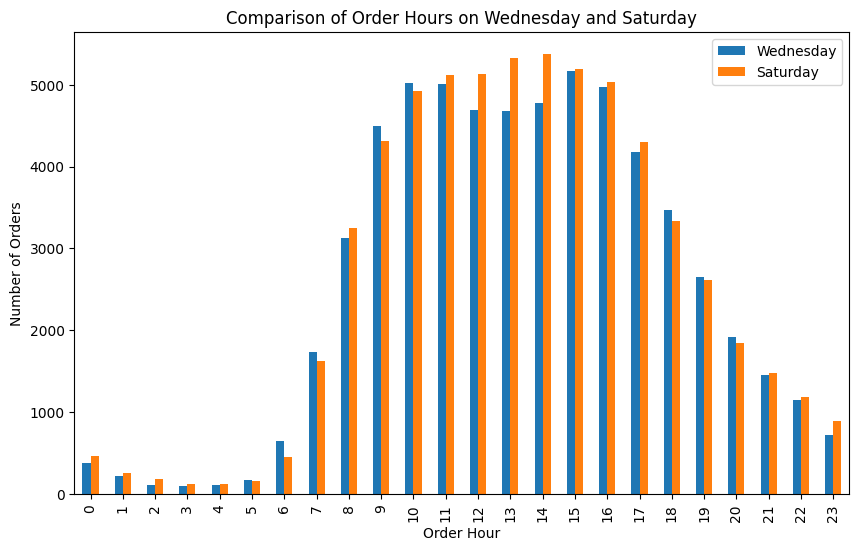

In [356]:
wednesday_and_saturday_compare.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Order Hours on Wednesday and Saturday')
plt.xlabel('Order Hour')
plt.ylabel('Number of Orders')
plt.show()

Escribe aquí tus conclusiones

**R:** Se nota que para los días sábados a partir de las 11:00 hr comienzan a subir las compras en comparación con el día miércoles, esto se puede deber a que es un día laboral, puede corresponder a las horas de la comida.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [357]:
# 2. Grafica la distribución para el número de órdenes que hacen los clientes
# (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
orders_by_client = df_instacart_orders.groupby(['user_id'])['order_id'].count()
print(orders_by_client)
print(orders_by_client.describe())

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64
count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64


<Axes: title={'center': 'Distribución número de pedidos por cliente'}, xlabel='Total ordenes', ylabel='Frecuencia'>

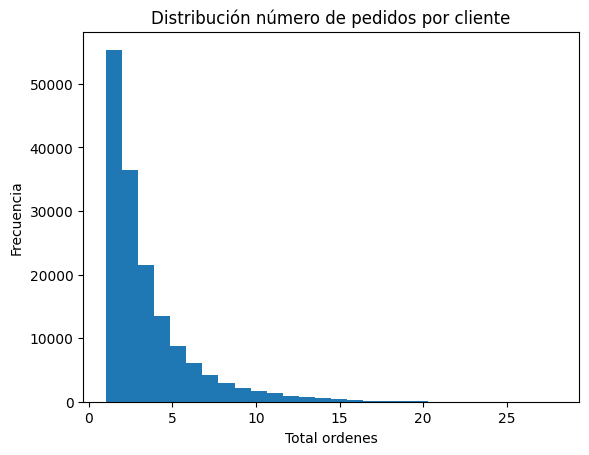

In [358]:
orders_by_client.plot(kind='hist', bins=28, title='Distribución número de pedidos por cliente', ylabel='Frecuencia', xlabel='Total ordenes')

Escribe aquí tus conclusiones

**R:** La mayoria de los clientes realizan de 1 a 10 pedidos, posteriormente comienza a decrecer la cantidad de clientes con más pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [359]:
df_order_products_fullname = df_order_products.merge(df_products, on='product_id')
best_selling_products = df_order_products_fullname.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20)


In [360]:
print(best_selling_products)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: order_id, dtype: int64


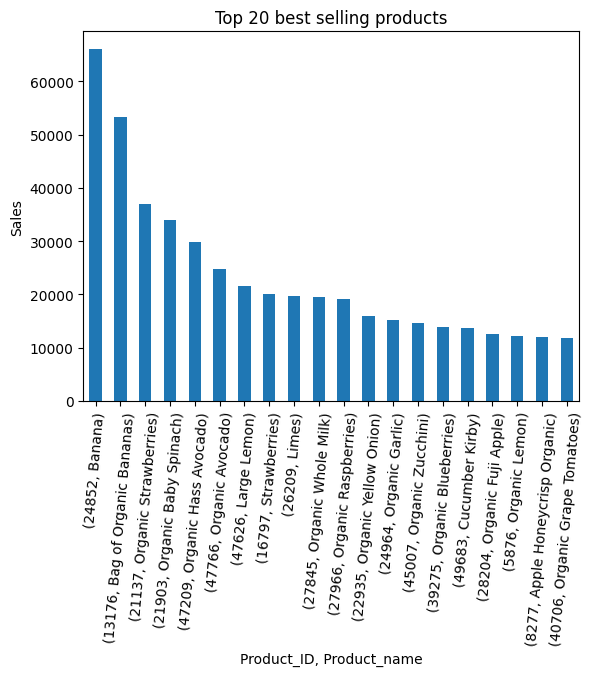

In [361]:
best_selling_products.plot(kind='bar', rot=85, title='Top 20 best selling products', xlabel='Product_ID, Product_name', ylabel='Sales')
plt.show()

Escribe aquí tus conclusiones

**R:** Los productos más vendidos son las Bananas, seguido de las fresas, espinaca y aguacates; tal vez hacen muchas ensalada :). Posteriormente las ventas de los siguientes productos son más uniformes

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [362]:
# De df_order_products calcular el total de productos comprados por pedido
total_products_by_order = df_order_products.groupby(['order_id'])['product_id'].count().sort_values()
print(total_products_by_order)

order_id
3421079      1
1288686      1
1288764      1
1288825      1
1288873      1
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 450046, dtype: int64


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


Text(0.5, 1.0, 'Distribución de número de productos por pedido')

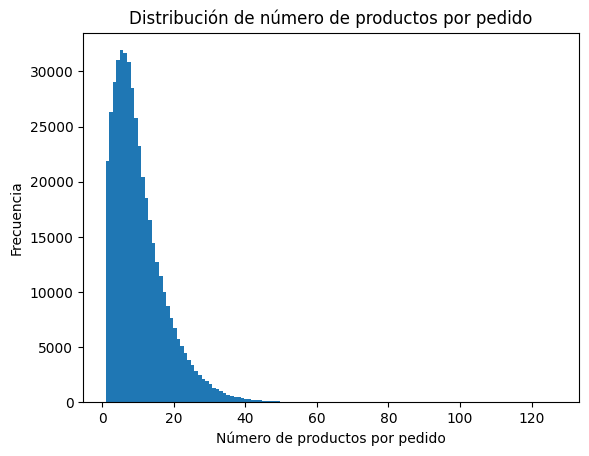

In [363]:
# Estadisticas del total de productos comprados por pedido
print(total_products_by_order.describe())

# Graficar la distribución de total_products_by_order
plt.hist(total_products_by_order, bins=127)
plt.xlabel('Número de productos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de número de productos por pedido')

Escribe aquí tus conclusiones

**R:** La media de productos comparado en un pedido es de 10

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [364]:
top_best_selling_products = df_order_products_fullname[df_order_products_fullname['reordered'] == 1].groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20)
print(top_best_selling_products)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64


Escribe aquí tus conclusiones

**R:** Al mostrar la lista considerando también los productos que se re-compran, algunos productos cambiar de orden comparado con sólo mostrar los productos más vendidos sin consideerar la re-compra.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [365]:
# 3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
# Calcular el total de pedidos de df_order_products
total_orders = df_order_products['order_id'].nunique()
print(total_orders)


450046


In [375]:
# De df_order_products calcular el numero de repeticiones del producto en cada pedido
product_count = df_order_products.groupby('product_id')['product_id'].count().sort_values(ascending=False)
print(product_count.head(20))

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [376]:
# Calculando la proporción por pedido en porcentaje
product_rate = product_count / total_orders
print(product_rate.head(20))

product_id
24852    0.146763
13176    0.118426
21137    0.082300
21903    0.075483
47209    0.066155
47766    0.054859
47626    0.047762
16797    0.044480
26209    0.043751
27845    0.043551
27966    0.042656
22935    0.035325
24964    0.033979
45007    0.032406
39275    0.030839
49683    0.030386
28204    0.027873
5876     0.027179
8277     0.026648
40706    0.026177
Name: product_id, dtype: float64


Escribe aquí tus conclusiones

**R:** Los productos mas comprados tiene una razón del 14.7% y 11.8%, posteriormente los productos tienen una tasa de compra menor al 10%

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
# 4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
# Agregar user_id a df_order_products
df_order_products_with_client = df_order_products.merge(df_instacart_orders, on='order_id')


450046


In [391]:
# De df_order_products calcular el numero de repeticiones del producto en cada pedido
product_by_user_count = df_order_products_with_client.groupby(['user_id', 'product_id'])['product_id'].count().sort_index()
# print(product_by_user_count.head(50))
client_rate_by_product = product_by_user_count / total_orders
print(client_rate_by_product.head(30))
print(client_rate_by_product.describe())

user_id  product_id
2        9681          0.000002
         12000         0.000002
         13176         0.000002
         16589         0.000002
         20574         0.000002
         21150         0.000002
         22474         0.000002
         22829         0.000002
         24852         0.000002
         27344         0.000002
         27966         0.000002
         30489         0.000002
         32139         0.000002
         32792         0.000004
         33276         0.000002
         34688         0.000002
         35917         0.000002
         36735         0.000002
         37646         0.000002
         45066         0.000002
         45613         0.000002
         47209         0.000002
         47766         0.000002
         48110         0.000002
         49451         0.000002
4        7160          0.000002
         42329         0.000002
5        3376          0.000002
         5999          0.000002
         8518          0.000002
Name: product_id, dt

Escribe aquí tus conclusiones

**R:** La tasa es muy baja

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
# 5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces
# en que fueron el primer artículo en añadirse al carrito)?
first_products_in_order = df_order_products_fullname[df_order_products_fullname['add_to_cart_order'] == 1]

In [197]:
print(first_products_in_order.head())

    order_id  product_id  add_to_cart_order  reordered  \
1     567889        1560                  1          1   
2    2261212       26683                  1          1   
14   1961225       37553                  1          1   
16    639939       10017                  1          1   
23    750040        8518                  1          0   

                                         product_name  aisle_id  department_id  
1                                          Bag Of Ice        37              1  
2   Cafe Latte Pure Lightly Sweetened Iced Coffee ...        91             16  
14                          Iced Coffee Lightly Sweet        26              7  
16                                      Tilapia Filet        39             12  
23                                  Organic Red Onion        83              4  


In [200]:
top_main_first_products = first_products_in_order.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False).head(20)
print(top_main_first_products)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

Escribe aquí tus conclusiones

**R:** El producto que principalmente ponen los clientes como primer producto en su carrito, son las bananas

### Conclusion general del proyecto:

**R:** Es muy importante analizar bien los datos, primero entenderlos, posteriormente la limpieza es un paso muy importante en el cual se debe tomar desiciones para no alterar o contaminar la información original.

Una vez que ya se ha realizado la limpieza, se puede comenzar el análisis de datos, ya sea realizando operaciones con ellos o graficandolos para entenderlos visualmente.